Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data

In [6]:
features = boston.feature_names

In [7]:
target = boston.target

In [8]:
x = pd.DataFrame(data, columns=features)

In [9]:
y = boston.target

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler 

In [13]:
scaler = StandardScaler()

In [14]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [15]:
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [16]:
from sklearn.manifold import TSNE

In [17]:
TSNE = TSNE(n_components=2, learning_rate=250, random_state=42)

In [18]:
x_train_scaled_tsne = TSNE.fit_transform(x_train_scaled)

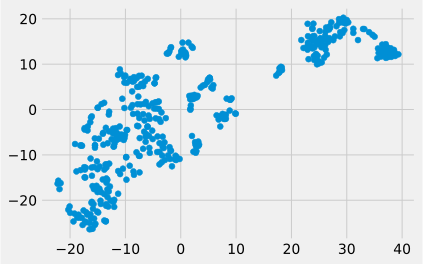

In [23]:
plt.scatter(x_train_scaled_tsne[:, 0], x_train_scaled_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [24]:
from sklearn.cluster import KMeans

In [29]:
km = KMeans(n_clusters=3, max_iter=100, random_state=42)

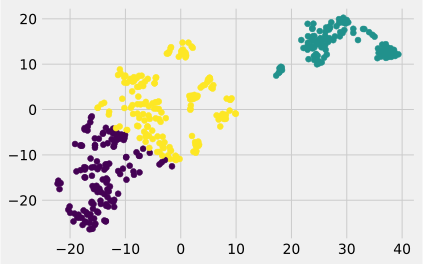

In [30]:
labels_train = km.fit_predict(x_train_scaled_tsne)

plt.scatter(x_train_scaled_tsne[:, 0], x_train_scaled_tsne[:, 1], c=labels_train)

plt.show()

In [35]:
x_train.loc[(labels_train == 0), 'CRIM'].mean()

0.09462279411764711

In [41]:
x_train.loc[(labels_train == 1), 'CRIM'].mean()

13.17982178217822

In [55]:
x_train.loc[(labels_train == 2), 'CRIM'].mean()

0.6829679640718564

In [44]:
y_train = pd.DataFrame(y_train, columns=['Price'])

In [45]:
y_train.loc[(labels_train == 0), 'Price'].mean()

26.564705882352936

In [46]:
y_train.loc[(labels_train == 1), 'Price'].mean()

16.277227722772285

In [56]:
y_train.loc[(labels_train == 2), 'Price'].mean()

23.67065868263472

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [49]:
x_test_scaled_tsne = TSNE.fit_transform(x_test_scaled)

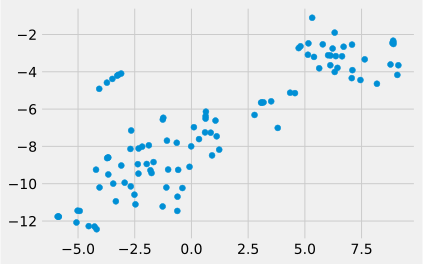

In [50]:
plt.scatter(x_test_scaled_tsne[:, 0], x_test_scaled_tsne[:, 1])

plt.show()

In [51]:
km = KMeans(n_clusters=3, max_iter=100, random_state=42)

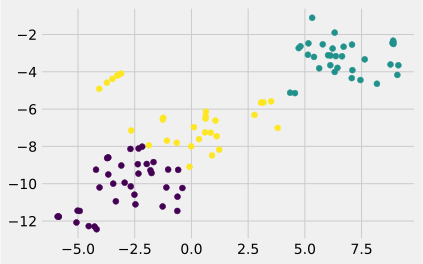

In [54]:
labels_test = km.fit_predict(x_test_scaled_tsne)

plt.scatter(x_test_scaled_tsne[:, 0], x_test_scaled_tsne[:, 1], c=labels_test)

plt.show()

In [57]:
y_test = pd.DataFrame(y_test, columns=['Price'])

In [58]:
y_test.loc[(labels_test == 0), 'Price'].mean()

26.910526315789472

In [59]:
y_test.loc[(labels_test == 1), 'Price'].mean()

16.421212121212122

In [60]:
y_test.loc[(labels_test == 2), 'Price'].mean()

20.23548387096774

In [67]:
x_test.loc[(labels_test == 0), 'CRIM'].mean()

0.10555710526315791

In [68]:
x_test.loc[(labels_test == 1), 'CRIM'].mean()

10.707682121212121

In [69]:
x_test.loc[(labels_test == 2), 'CRIM'].mean()

0.41909322580645153